In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
import genjax
import rerun as rr

In [3]:
from tracking.model import model_factory, rerun_log_trace

In [4]:
PORT = 8812
rr.init("tracking")
rr.connect(addr=f'127.0.0.1:{PORT}')

In [5]:
model = model_factory(
    max_T = 10,
    width = 50,
    height = 40,
    pose_kernel_params = (1.0, 1.0),
    max_keypoint_mesh_width = 4,
    max_keypoint_mesh_height = 4,
    max_depth = 20.0
)

key = jax.random.PRNGKey(3)
trace = model.simulate(key, (10,))

In [6]:
trace.get_retval()[2]

(Array([[[0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         ...,
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ]],
 
        [[0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         ...,
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ]],
 
        [[0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         ...,
         [0.       , 0.       , 0.       , 0.       ],
         [0.       , 0.       , 0.       , 0.       ],
         [0.     

In [7]:
rerun_log_trace(trace)

TypeError: tuple indices must be integers or slices, not tuple

In [17]:
from tracking.mesh import Mesh

sq = jax.vmap(
    lambda x: Mesh.square_mesh([0., 0.], [x, x], jnp.array([0., 0., 0., 1.]))
)(jnp.array([20., 30.]))

def render_mesh(mesh):
    return mesh.to_image(64, 64,
            lambda rgbd: rgbd[-1],
            jnp.array([1., 1., 1., 10.])
        )

img = jax.vmap(render_mesh)(sq)
img[0].shape

AttributeError: 'Pose' object has no attribute 'ndim'

In [20]:
from tracking.mesh import Mesh

sq = Mesh.square_mesh(jnp.array([0., 0.]), jnp.array([20., 20.]), jnp.array([0., 0., 0., 1.]))

img = sq.to_image(64, 64,
        lambda rgbd: rgbd[-1],
        jnp.array([1., 1., 1., 10.])
    )

img[0].shape

TypeError: Value Pose(position=Traced<ShapedArray(float32[1,1,3])>with<DynamicJaxprTrace(level=1/1)>, quaternion=Traced<ShapedArray(float32[1,1,4])>with<DynamicJaxprTrace(level=1/1)>) with type <class 'b3d.pose.Pose'> is not a valid JAX type

In [13]:
mesh = sq
depths = jax.vmap(jax.vmap(attributes_to_depth))(mesh.attributes)


NameError: name 'attributes_to_depth' is not defined

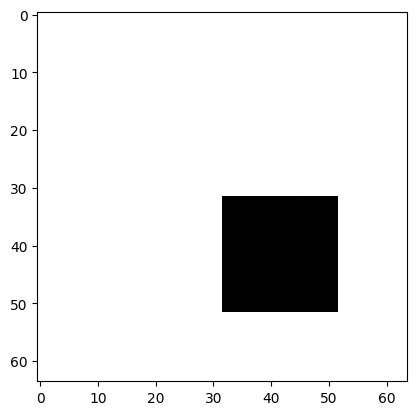

In [11]:
import matplotlib.pyplot as plt
plt.imshow(img[0])

In [124]:
width, height = 20, 20
bottom_lefts = jnp.meshgrid(jnp.arange(width), jnp.arange(height))
bottom_lefts = jnp.stack(bottom_lefts, axis=-1).reshape(-1, 2)
bottom_lefts.shape

(400, 2)

In [131]:
from tracking.mesh import Mesh

In [132]:
width, height = 12, 15
attributes = jnp.ones((width, height, 4))

In [133]:
bottom_lefts = jnp.meshgrid(jnp.arange(width), jnp.arange(height))
bottom_lefts = jnp.stack(bottom_lefts, axis=-1).reshape(-1, 2)
widthheights = jnp.ones((width * height, 2))
attributes = attributes.reshape((-1, attributes.shape[-1]))


In [135]:
vmapped_mesh = jax.vmap(Mesh.square_mesh, in_axes=(0, 0, 0))(bottom_lefts, widthheights, attributes)


In [136]:
vertices = vmapped_mesh.vertices.reshape((-1, 2))
n_vertices_per_face = vmapped_mesh.vertices.shape[1]


In [143]:
vmapped_mesh.faces.shape

(180, 2, 3)

In [144]:
# Generate the base array
# arr = jnp.arange(vertices.shape[0])




Array([[  0,   1,   2],
       [  0,   2,   3],
       [  0,   1,   2],
       ...,
       [356, 358, 359],
       [356, 357, 358],
       [356, 358, 359]], dtype=int32)